# Analysis of a maximal exercise test

<b>Protocol ergometer:</b>
resistance mode with one minute resistance steps and a constant comfortable velocity (as target velocity) with velocity target, individual resistance calculated from the wingate test

<b>Description of the sprint test: </b>
Participants are asked to maintain the target velocity as long as possible. Test is terminated if they can not maintain the velocity

<b>Outcome: </b>
Power and physiological output parameters for the maximal exercise capacity, aerobic threshold and anaerobic threshold

First, let us import the right package(s)

In [1]:
import worklab as wl
import os

filename = os.getcwd()
filename_ergo = os.path.join('r',filename, 'example_data', 'Max ergo_example.xls')
filename_spiro = os.path.join('r',filename, 'example_data', 'Max spiro_example.xlsx')

Let's define some user-specific variables (you can alternatively store these in a separate file)

In [2]:
muser = 65   # kg, mass user
start_ergo = 180  # s, start maximal exercise test ergometer
start_spiro = 240  # s, start maximal exercise test spirometer
duration = 600  # s, duration maximal exercise test

Import and process data ergometer:

In [3]:
wheelchair = wl.com.load_wheelchair(filename_ergo)
data = wl.com.load_esseda(filename_ergo)
data = wl.kin.filter_ergo(data)
data = wl.kin.process_ergo(data, wheelsize=wheelchair['wheelsize'], rimsize=wheelchair['rimsize'])
data = wl.ana.mean_data(data)
data = wl.ana.cut_data(data, start_ergo, start_ergo+duration)
for side in data:
        data[side]['speed'] = data[side]['speed'] * 3.6

The ergometer data is ready and we have to process the spirometer data. In this case, we used the COSMED K5. There is also a function for the METAMAX 3B, other devices we do not support (yet) but you can make the code yourself ofcourse!

In [4]:
data_spiro = wl.com.load_spiro(filename_spiro)

Now we have imported both data sources and it is time to combine them!

      POpeak   VO2peak  HRmax    RERmax       VEmax
0  82.611107  2.658131    184  1.199528  116.416267


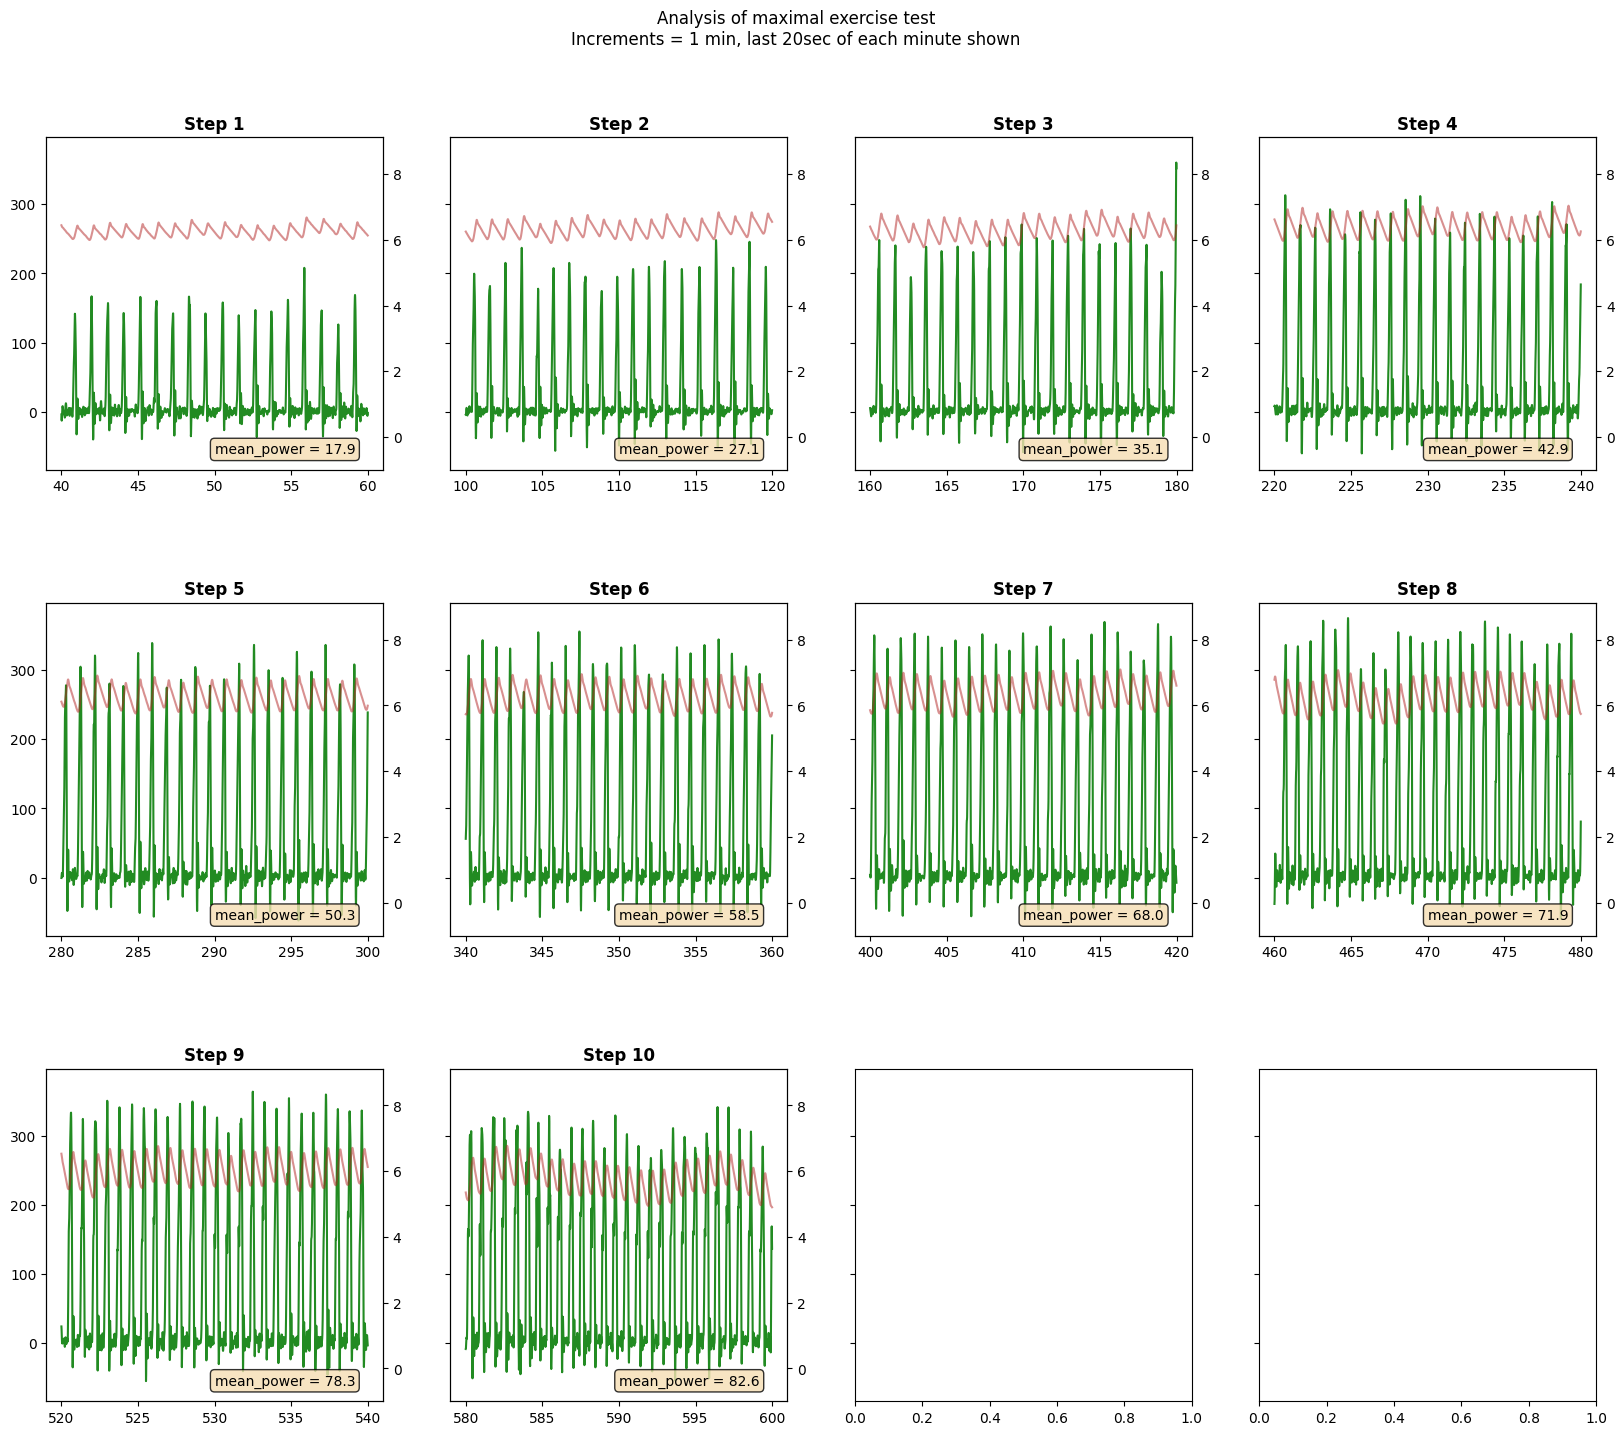

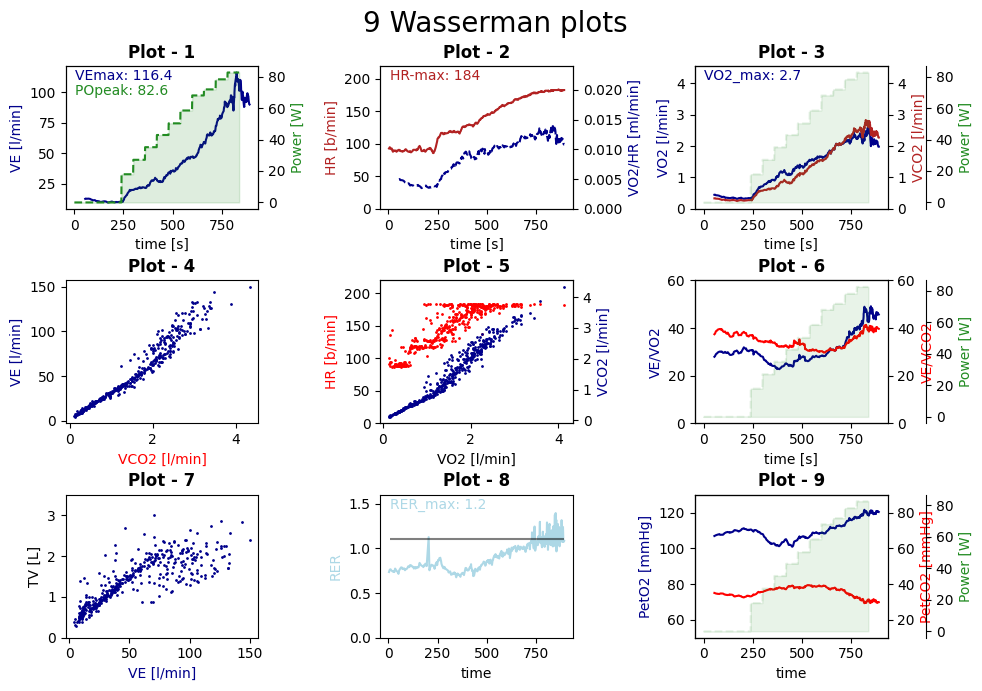

In [5]:
fig_max, maxtest = wl.ana.maximal1min(data, duration)

power = wl.utils.power_per_min(data, duration, start_spiro)
fig_wasserman, gxt_results = wl.physio.wasserman(data_spiro, power)
print(gxt_results)

Our package also gives you a tool to define the aerobic and anaerobic thresholds. Since they require user input, it is unfortunately not possible to show you in these jupyter notebook. But feel free to try it out yourself!

In [6]:
# fig_vt1, vt1 = wl.physio.aerobic_threshold(data_spiro, power, start_spiro, muser)

#fig_vt2, vt2 = wl.physio.anaerobic_threshold(data_spiro, power, start_spiro, muser)

# thresholds = vt1.join(vt2)